#### Data Variables

In [2]:
import pandas as pd

file_path = r"C:\Users\john\Downloads\EDA_SA2\Female_Dataset.csv"

df = pd.read_csv(file_path)

columns = [
    'AGE_R',        # Age at interview
    'RELIGION',     # Current religious affiliation
    'MARSTAT',      # Marital or cohabiting status
    'vry1stag',     # Age at first sexual intercourse
    'LVSIT14F',     # Female parent figure at age 14
    'LVSIT14M',     # Male parent figure at age 14
    'MENARCHE',     # Age at first menstrual period
    'ECTIMESX',     # Number of times emergency contraception used
    'CONDSEXL',     # Condom used at last sex
    'PARTS1YR',     # Opposite-sex sexual partners in last 12 months
    'CURRPRTT'      # Current male sexual partners
]

df_analysis = df[columns].copy()

# Preview the first few rows
df_analysis.head()

,AGE_R,RELIGION,MARSTAT,vry1stag,LVSIT14F,LVSIT14M,MENARCHE,ECTIMESX,CONDSEXL,PARTS1YR,CURRPRTT
0,29,4,3,21.0,NaN,NaN,9,NaN,NaN,0.0,0
1,18,2,3,NaN,NaN,NaN,13,NaN,NaN,NaN,0
2,37,1,2,17.0,NaN,NaN,12,2.0,NaN,1.0,1
3,40,1,1,16.0,NaN,NaN,11,NaN,NaN,1.0,1
4,49,1,3,15.0,NaN,NaN,14,NaN,NaN,1.0,1


In [4]:
for col in ['RELIGION', 'MARSTAT', 'CONDSEXL']:
    print(f"\n{col} value counts:")
    print(df_analysis[col].value_counts(dropna=False))


RELIGION value counts:
RELIGION
3    2106
1    1955
2     979
4     546
Name: count, dtype: int64

MARSTAT value counts:
MARSTAT
3    2808
1    2100
2     669
8       8
9       1
Name: count, dtype: int64

CONDSEXL value counts:
CONDSEXL
NaN    4425
1.0     858
5.0     296
9.0       4
8.0       3
Name: count, dtype: int64


#### Data Cleaning

In [8]:
import numpy as np

df = df[columns].copy()

# Replace known codes for missing with NaN
missing_codes = [97, 98, 99, 8, 9, '.', ' ', 'Refused', 'Don’t Know']
df.replace(missing_codes, np.nan, inplace=True)

# Convert columns to numeric (in case some are read as strings)
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# RELIGION: 1-No religion, 2-Catholic, 3-Protestant, 4-Other religion
df['RELIGION_CAT'] = df['RELIGION'].map({
    1: 'No religion',
    2: 'Catholic',
    3: 'Protestant',
    4: 'Other religion'
})

# MARSTAT: 1-Married, 2-Living together, 3-Neither
df['MARSTAT_CAT'] = df['MARSTAT'].map({
    1: 'Married',
    2: 'Cohabiting',
    3: 'Neither'
})

# CONDSEXL: 1-Yes, 5-No
df['CONDSEXL_CAT'] = df['CONDSEXL'].map({
    1: 'Yes',
    5: 'No'
})

# LVSIT14F & LVSIT14M: Recoding for parental figures
df['LVSIT14F_CAT'] = df['LVSIT14F'].map({
    1: 'Bio/Adoptive Mother',
    2: 'Other Mother Figure',
    3: 'No Mother Figure'
})
df['LVSIT14M_CAT'] = df['LVSIT14M'].map({
    1: 'Bio/Adoptive Father',
    2: 'Step Father',
    3: 'No Father Figure',
    4: 'Other Father Figure'
})


# Age Group Binning
bins = [14, 19, 24, 29, 34, 39, 44, 49, 55]
labels = ['15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50+']
df['AGE_GROUP'] = pd.cut(df['AGE_R'], bins=bins, labels=labels)

# Sexual debut group (vry1stag)
df['SEX_DEBUT_GROUP'] = pd.cut(df['vry1stag'],
                               bins=[9, 14, 17, 19, 49],
                               labels=['≤14', '15-17', '18-19', '20+'])

# Emergency contraception frequency group
df['EC_USE_GROUP'] = pd.cut(df['ECTIMESX'],
                            bins=[0, 1, 2, 5, 10, 100],
                            labels=['Once', 'Twice', '3-5x', '6-10x', '10+'],
                            include_lowest=True)

# View cleaned data
print(df[['AGE_R', 'AGE_GROUP', 'RELIGION_CAT', 'MARSTAT_CAT', 'SEX_DEBUT_GROUP', 'EC_USE_GROUP']].head())

   AGE_R AGE_GROUP    RELIGION_CAT MARSTAT_CAT SEX_DEBUT_GROUP EC_USE_GROUP
0     29     25-29  Other religion     Neither             20+          NaN
1     18     15-19        Catholic     Neither             NaN          NaN
2     37     35-39     No religion  Cohabiting           15-17        Twice
3     40     40-44     No religion     Married           15-17          NaN
4     49     45-49     No religion     Neither           15-17          NaN


In [10]:
df

,AGE_R,RELIGION,MARSTAT,vry1stag,LVSIT14F,LVSIT14M,MENARCHE,ECTIMESX,CONDSEXL,PARTS1YR,CURRPRTT,RELIGION_CAT,MARSTAT_CAT,CONDSEXL_CAT,LVSIT14F_CAT,LVSIT14M_CAT,AGE_GROUP,SEX_DEBUT_GROUP,EC_USE_GROUP
0,29,4,3.0,21.0,NaN,NaN,NaN,NaN,NaN,0.0,0,Other religion,Neither,NaN,NaN,NaN,25-29,20+,NaN
1,18,2,3.0,NaN,NaN,NaN,13.0,NaN,NaN,NaN,0,Catholic,Neither,NaN,NaN,NaN,15-19,NaN,NaN
2,37,1,2.0,17.0,NaN,NaN,12.0,2.0,NaN,1.0,1,No religion,Cohabiting,NaN,NaN,NaN,35-39,15-17,Twice
3,40,1,1.0,16.0,NaN,NaN,11.0,NaN,NaN,1.0,1,No religion,Married,NaN,NaN,NaN,40-44,15-17,NaN
4,49,1,3.0,15.0,NaN,NaN,14.0,NaN,NaN,1.0,1,No religion,Neither,NaN,NaN,NaN,45-49,15-17,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5581,20,1,3.0,20.0,NaN,NaN,13.0,NaN,1.0,1.0,1,No religion,Neither,Yes,NaN,NaN,20-24,20+,NaN
5582,46,4,1.0,23.0,1.0,3.0,18.0,NaN,NaN,1.0,1,Other religion,Married,NaN,Bio/Adoptive Mother,No Father Figure,45-49,20+,NaN
5583,22,1,1.0,14.0,NaN,NaN,NaN,3.0,NaN,1.0,1,No religion,Married,NaN,NaN,NaN,20-24,≤14,3-5x
5584,20,4,3.0,NaN,1.0,1.0,11.0,NaN,NaN,NaN,0,Other religion,Neither,NaN,Bio/Adoptive Mother,Bio/Adoptive Father,20-24,NaN,NaN


#### Poisson Regression

In [16]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df_model = df[['PARTS1YR', 'AGE_R', 'RELIGION_CAT', 'MARSTAT_CAT', 'SEX_DEBUT_GROUP', 'CONDSEXL_CAT']].dropna()

print("Mean of PARTS1YR:", df_model['PARTS1YR'].mean())
print("Variance of PARTS1YR:", df_model['PARTS1YR'].var())

Mean of PARTS1YR: 1.052120141342756
Variance of PARTS1YR: 1.1033818847575405


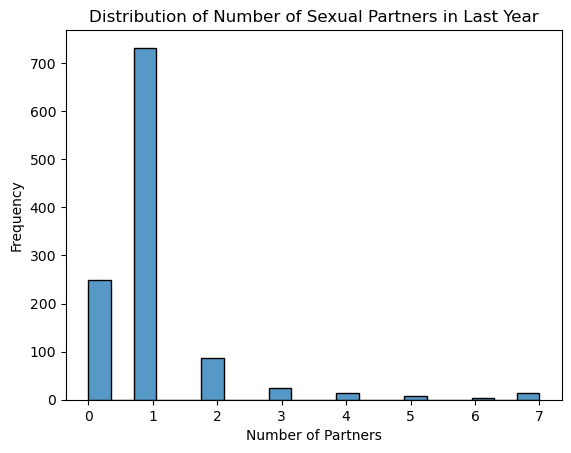

In [18]:
sns.histplot(df_model['PARTS1YR'], bins=20, kde=False)
plt.title("Distribution of Number of Sexual Partners in Last Year")
plt.xlabel("Number of Partners")
plt.ylabel("Frequency")
plt.show()

In [22]:
model = smf.glm(
formula="PARTS1YR ~ AGE_R + C(RELIGION_CAT) + C(MARSTAT_CAT) + C(SEX_DEBUT_GROUP) + C(CONDSEXL_CAT)",
data=df_model,
family=sm.families.Poisson()
).fit()

print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               PARTS1YR   No. Observations:                 1132
Model:                            GLM   Df Residuals:                     1121
Model Family:                 Poisson   Df Model:                           10
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1422.9
Date:                Tue, 20 May 2025   Deviance:                       942.21
Time:                        19:37:45   Pearson chi2:                 1.09e+03
No. Iterations:                     5   Pseudo R-squ. (CS):            0.05326
Covariance Type:            nonrobust                                         
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

In [24]:
print(f"Deviance: {model.deviance:.2f}")
print(f"Degrees of Freedom: {model.df_resid}")
print(f"Deviance / DF: {model.deviance / model.df_resid:.2f} (should be ~1 for good fit)")

Deviance: 942.21
Degrees of Freedom: 1121
Deviance / DF: 0.84 (should be ~1 for good fit)


In [26]:
mean = df_model['PARTS1YR'].mean()
var = df_model['PARTS1YR'].var()
print(f"Mean: {mean:.2f}, Variance: {var:.2f}")
print("Overdispersion suspected" if var > mean else "No overdispersion")

Mean: 1.05, Variance: 1.10
Overdispersion suspected


#### Contingency Tables

(MARSTAT_CAT   Cohabiting  Married  Neither
 CONDSEXL_CAT                              
 No                    54      114      127
 Yes                   93      273      492,
 20.996880264567807,
 2.7579436086198746e-05,
 2)

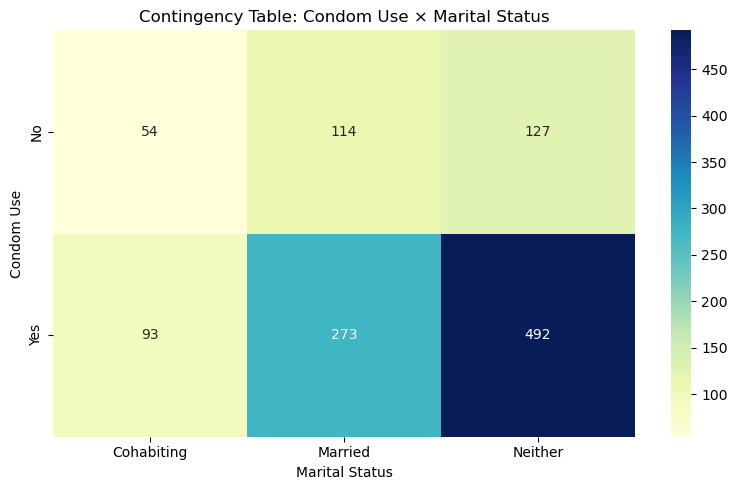

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Load the dataset used earlier
data = df.copy()

# Create a contingency table: CONTRACEPTIVE_METHOD (e.g., CONDSEXL_CAT) × MARITAL_STATUS (e.g., MARSTAT_CAT)
contingency_table = pd.crosstab(data['CONDSEXL_CAT'], data['MARSTAT_CAT'])

# Perform Chi-square test
chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)

# Create a heatmap for visualization
plt.figure(figsize=(8, 5))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Contingency Table: Condom Use × Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Condom Use')
plt.tight_layout()

# Return results
contingency_table, chi2_stat, p_val, dof


#### Categorical Response Modeling

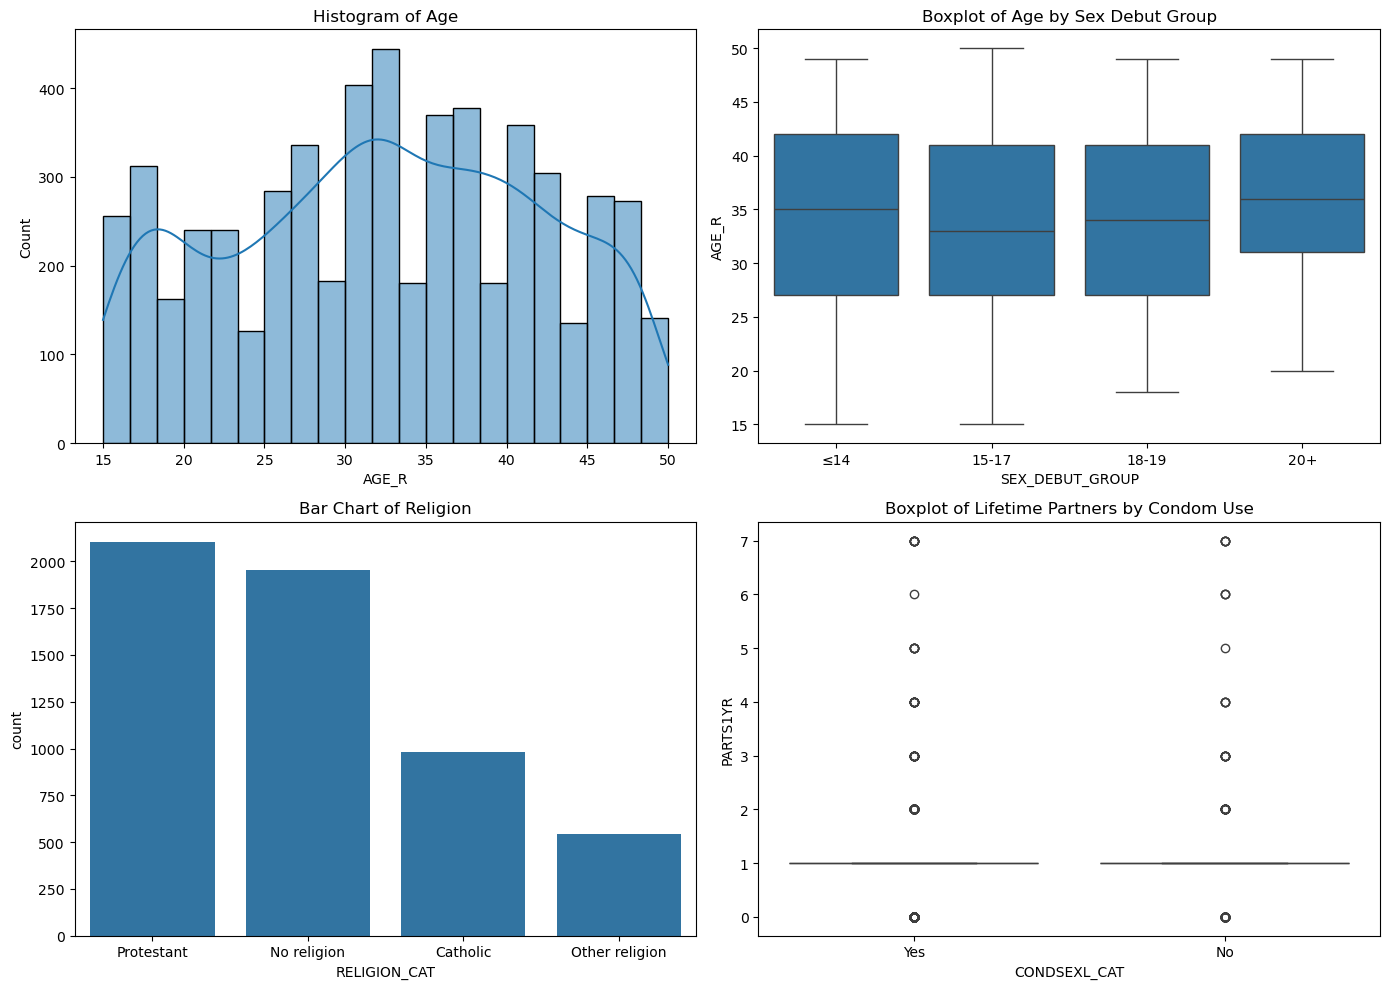

,Comparison,Raw P-Value,FDR Adjusted,Bonferroni Adjusted
0,MARSTAT_CAT: Neither vs Married,3.164849e-12,8.228607e-11,8.228607e-11
1,SEX_DEBUT_GROUP: 20+ vs 15-17,2.389562e-10,3.106431e-09,6.212861e-09
2,RELIGION_CAT: Catholic vs No religion,6.779162e-06,5.875274e-05,1.762582e-04
3,SEX_DEBUT_GROUP: 20+ vs ≤14,9.778193e-06,6.355826e-05,2.542330e-04
4,RELIGION_CAT: Catholic vs Protestant,1.605547e-04,8.348843e-04,4.174421e-03
5,MARSTAT_CAT: Neither vs Cohabiting,4.796297e-04,2.078395e-03,1.247037e-02
6,EC_USE_GROUP: 3-5x vs Once,9.455809e-04,3.512157e-03,2.458510e-02
7,EC_USE_GROUP: Twice vs 3-5x,1.521912e-03,4.946215e-03,3.956972e-02
8,SEX_DEBUT_GROUP: 20+ vs 18-19,2.435935e-03,7.037146e-03,6.333432e-02
9,SEX_DEBUT_GROUP: 15-17 vs 18-19,6.494183e-03,1.688487e-02,1.688487e-01


In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.multitest import multipletests
from scipy.stats import ttest_ind, chi2_contingency

# Select relevant numeric and categorical variables for EDA
numeric_vars = ['AGE_R', 'PARTS1YR']
categorical_vars = ['RELIGION_CAT', 'MARSTAT_CAT', 'CONDSEXL_CAT', 'SEX_DEBUT_GROUP', 'EC_USE_GROUP']

# Create EDA plots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
sns.histplot(df['AGE_R'].dropna(), kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Histogram of Age')

sns.boxplot(data=df, x='SEX_DEBUT_GROUP', y='AGE_R', ax=axes[0, 1])
axes[0, 1].set_title('Boxplot of Age by Sex Debut Group')

sns.countplot(data=df, x='RELIGION_CAT', order=df['RELIGION_CAT'].value_counts().index, ax=axes[1, 0])
axes[1, 0].set_title('Bar Chart of Religion')

sns.boxplot(data=df, x='CONDSEXL_CAT', y='PARTS1YR', ax=axes[1, 1])
axes[1, 1].set_title('Boxplot of Lifetime Partners by Condom Use')

plt.tight_layout()

# Multiple comparisons: test differences in PARTS1YR by each categorical variable
p_values = []
grouped_tests = []

for var in categorical_vars:
    categories = df[var].dropna().unique()
    if len(categories) > 1:
        data_by_cat = [df[df[var] == cat]['PARTS1YR'].dropna() for cat in categories]
        if all(len(x) > 1 for x in data_by_cat):
            # Perform ANOVA-like pairwise t-tests
            for i in range(len(categories)):
                for j in range(i + 1, len(categories)):
                    t_stat, p_val = ttest_ind(data_by_cat[i], data_by_cat[j], equal_var=False)
                    p_values.append(p_val)
                    grouped_tests.append(f"{var}: {categories[i]} vs {categories[j]}")

# Adjust p-values using FDR and Bonferroni
adjusted_fdr = multipletests(p_values, method='fdr_bh')
adjusted_bonf = multipletests(p_values, method='bonferroni')

# Combine results
comparison_results = pd.DataFrame({
    'Comparison': grouped_tests,
    'Raw P-Value': p_values,
    'FDR Adjusted': adjusted_fdr[1],
    'Bonferroni Adjusted': adjusted_bonf[1]
})

comparison_results.sort_values('Raw P-Value', inplace=True)
comparison_results.reset_index(drop=True, inplace=True)

plt.show()
comparison_results.head(10)  # Show top 10 results for review
